In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df_Tata = pd.read_csv("TATAMOTORS_with_indicators_.csv")

In [4]:
train_size = int(0.8 * len(df_Tata))

df_train_tata = df_Tata[:train_size]
df_test_tata = df_Tata[train_size:]

In [5]:
df_train_tata

,date,open,high,low,close,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,2015-02-02 14:30:00+05:30,591.30,591.85,590.05,590.05,46808,591.93,593.215,591.446667,589.5925,...,18.518076,0.000000,7.618849,43.940031,-51.141553,1.962061,1.80,590.650000,33.740113,1.177608
1,2015-02-02 14:35:00+05:30,589.80,590.50,588.60,590.50,77183,591.37,592.785,591.813333,589.9750,...,16.204258,12.051888,4.017296,48.694251,-57.541899,1.957628,1.90,589.866667,32.404181,1.028755
2,2015-02-02 14:40:00+05:30,590.25,591.55,589.45,589.45,62950,590.93,592.330,592.000000,590.2750,...,18.151815,0.000000,4.017296,46.708143,-75.151515,1.967798,2.10,590.150000,31.377250,0.924290
3,2015-02-02 14:45:00+05:30,589.30,589.95,588.40,588.90,78077,590.09,591.765,592.093333,590.4875,...,21.485149,0.000000,4.017296,42.824629,-92.465753,1.937955,1.55,589.083333,30.566204,0.803627
4,2015-02-02 14:50:00+05:30,588.90,591.70,588.40,591.00,66550,589.98,591.355,592.140000,590.8175,...,34.064667,100.000000,33.333333,49.822307,-64.137931,2.035244,3.30,590.366667,29.669480,0.529479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104272,2020-09-24 10:50:00+05:30,125.00,125.40,124.90,125.00,806218,125.09,125.600,126.193333,126.6225,...,14.285714,79.399090,26.466363,28.260291,-95.454545,0.723086,0.50,125.100000,20.937365,0.500466
104273,2020-09-24 10:55:00+05:30,125.05,126.10,124.95,125.80,1125524,125.21,125.550,126.046667,126.5050,...,34.063492,100.000000,59.799697,37.900778,-71.212121,0.753580,1.15,125.616667,22.026976,0.130863
104274,2020-09-24 11:00:00+05:30,125.85,125.85,125.20,125.30,550132,125.24,125.425,125.870000,126.3675,...,42.888889,74.762321,84.720470,34.915833,-83.636364,0.746181,0.65,125.450000,23.353467,0.014244
104275,2020-09-24 11:05:00+05:30,125.30,125.40,124.90,124.90,918361,125.19,125.280,125.696667,126.2225,...,38.666667,56.881393,77.214571,33.392032,-97.777778,0.728597,0.50,125.066667,24.730442,0.152629


In [6]:
df_train_tata['date'] = pd.DatetimeIndex(pd.date_range('2021-11-20 02:59:00+05:30', periods=len(df_train_tata),  freq='min')) #sobreescribo mi columna date con nuevo range por minutos 
df_train_tata = df_train_tata.set_index('date') # pongo la columna fecha como indice. para facilitar el analisis.

df_train_tata['year'] = df_train_tata.index.year
df_train_tata['month'] = df_train_tata.index.month
df_train_tata['day'] = df_train_tata.index.day
df_train_tata['weekday'] = df_train_tata.index.day_name()
df_train_tata['weekofyear'] = df_train_tata.index.isocalendar().week
df_train_tata['hour'] = df_train_tata.index.hour
df_train_tata['minute'] = df_train_tata.index.minute

weekday_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df_train_tata['weekday'] = df_train_tata['weekday'].map(weekday_mapping)

In [7]:
df_test_tata['date'] = pd.DatetimeIndex(pd.date_range('2021-11-20 02:59:00+05:30', periods=len(df_test_tata),  freq='min'))
df_test_tata = df_test_tata.set_index('date')

df_test_tata['year'] = df_test_tata.index.year
df_test_tata['month'] = df_test_tata.index.month
df_test_tata['day'] = df_test_tata.index.day
df_test_tata['weekday'] = df_test_tata.index.day_name()
df_test_tata['weekofyear'] = df_test_tata.index.isocalendar().week
df_test_tata['hour'] = df_test_tata.index.hour
df_test_tata['minute'] = df_test_tata.index.minute

weekday_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df_test_tata['weekday'] = df_test_tata['weekday'].map(weekday_mapping)

In [8]:
df_train_tata.head()

,open,high,low,close,volume,sma5,sma10,sma15,sma20,ema5,...,TYPPRICE,HT_DCPERIOD,BETA,year,month,day,weekday,weekofyear,hour,minute
date,,,,,,,,,,,,,,,,,,,,,
2021-11-20 02:59:00+05:30,591.30,591.85,590.05,590.05,46808,591.93,593.215,591.446667,589.5925,591.680691,...,590.650000,33.740113,1.177608,2021,11,20,6,46,2,59
2021-11-20 03:00:00+05:30,589.80,590.50,588.60,590.50,77183,591.37,592.785,591.813333,589.9750,591.287127,...,589.866667,32.404181,1.028755,2021,11,20,6,46,3,0
2021-11-20 03:01:00+05:30,590.25,591.55,589.45,589.45,62950,590.93,592.330,592.000000,590.2750,590.674751,...,590.150000,31.377250,0.924290,2021,11,20,6,46,3,1
2021-11-20 03:02:00+05:30,589.30,589.95,588.40,588.90,78077,590.09,591.765,592.093333,590.4875,590.083168,...,589.083333,30.566204,0.803627,2021,11,20,6,46,3,2
2021-11-20 03:03:00+05:30,588.90,591.70,588.40,591.00,66550,589.98,591.355,592.140000,590.8175,590.388778,...,590.366667,29.669480,0.529479,2021,11,20,6,46,3,3


In [9]:
df_train_tata.describe()

,open,high,low,close,volume,sma5,sma10,sma15,sma20,ema5,...,TYPPRICE,HT_DCPERIOD,BETA,year,month,day,weekday,weekofyear,hour,minute
count,104277.000000,104277.000000,104277.000000,104277.000000,1.042770e+05,104277.000000,104277.000000,104277.000000,104277.000000,104277.000000,...,104277.000000,104277.000000,104277.000000,104277.000000,104277.000000,104277.000000,104277.000000,104277.0,104277.000000,104277.000000
mean,323.737121,324.189242,323.260024,323.725734,2.776797e+05,323.734693,323.745926,323.757110,323.768197,323.734698,...,323.725000,21.984318,0.526197,2021.421723,7.210861,17.264747,4.043289,30.905051,11.476874,29.499209
std,146.265682,146.390486,146.131482,146.261507,5.676268e+05,146.261627,146.262211,146.262709,146.263047,146.260612,...,146.260758,5.070070,0.736778,0.493837,5.314422,8.902733,2.025937,22.925946,6.912499,17.317806
min,63.600000,64.700000,63.500000,63.600000,0.000000e+00,64.570000,64.895000,65.213333,65.302500,64.809379,...,63.950000,11.448817,-12.360580,2021.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
25%,176.050000,176.350000,175.750000,176.050000,5.315500e+04,176.040000,176.035000,176.070000,176.102500,176.036252,...,176.050000,18.306562,0.165138,2021.000000,1.000000,10.000000,2.000000,3.0,5.000000,14.000000
50%,352.000000,352.500000,351.500000,352.000000,1.098190e+05,351.990000,352.025000,352.056667,352.065000,351.977990,...,351.966667,21.105846,0.478023,2021.000000,11.000000,19.000000,4.000000,47.0,11.000000,29.000000
75%,444.700000,445.200000,444.100000,444.650000,2.756680e+05,444.680000,444.685000,444.663333,444.682500,444.684766,...,444.666667,24.704270,0.830484,2022.000000,12.000000,25.000000,6.000000,50.0,17.000000,44.000000
max,611.700000,612.000000,609.650000,611.950000,5.234495e+07,609.710000,608.835000,608.530000,607.852500,609.276942,...,610.883333,45.583497,21.337113,2022.000000,12.000000,31.000000,7.000000,52.0,23.000000,59.000000


In [10]:
import plotly.graph_objects as go
from datetime import datetime

In [11]:
fig = go.Figure(data=[go.Candlestick(x=df_train_tata.index[:5000],
                open=df_train_tata['open'][:5000],
                high=df_train_tata['high'][:5000],
                low=df_train_tata['low'][:5000],
                close=df_train_tata['close'][:5000])],
                layout=go.Layout(autosize=False, width=1000, height=600))

fig.show()

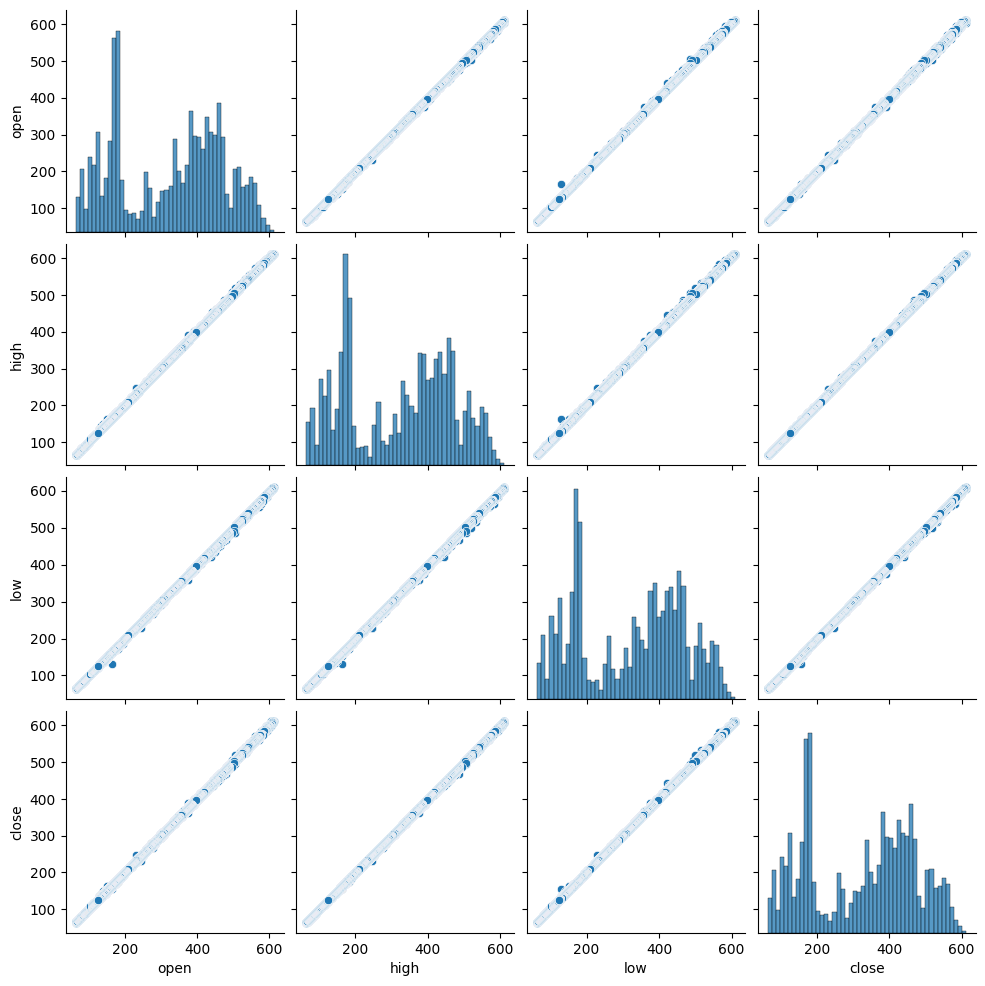

In [12]:
import seaborn as sns
sns.pairplot(df_train_tata[['open', 'high', 'low', 'close']])

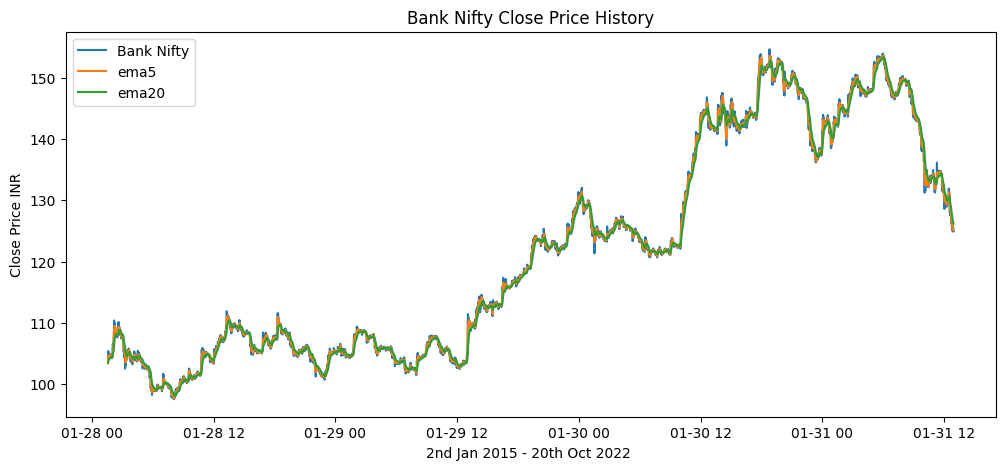

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(df_train_tata['close'][-5000:], label='Bank Nifty')
plt.plot(df_train_tata['ema5'][-5000:], label='ema5')
plt.plot(df_train_tata['ema20'][-5000:], label='ema20')
plt.title('Bank Nifty Close Price History')
plt.xlabel("2nd Jan 2015 - 20th Oct 2022 ")
plt.ylabel("Close Price INR")
plt.legend(loc="upper left")
plt.show()

In [14]:
def ema_5_20_crossover(data): # Expecting a dataframe, where close price, ema5 and ema20 value present
    buy_signal, sell_signal = [], []
    buy_price, sell_price = [], []
    flag = -1
    for i in range(len(data)):
        if data['ema5'][i] > data['ema20'][i]:
            if flag != 1:  # fresh buy signal
                buy_signal.append(1)
                buy_price.append(data['close'][i])
                sell_signal.append(np.nan)
                sell_price.append(np.nan)
                flag = 1
            else:  # if buy signal is already executed, then append everything as nan
                buy_signal.append(np.nan)
                buy_price.append(np.nan)
                sell_signal.append(np.nan)
                sell_price.append(np.nan)
        elif data['ema5'][i] < data['ema20'][i]:
            if flag != 0:  # sell signal
                sell_signal.append(0)
                sell_price.append(data['close'][i])
                buy_signal.append(np.nan)
                buy_price.append(np.nan)
                flag = 0
            else:   # if sell signal is already executed, then append everything as nan
                buy_signal.append(np.nan)
                buy_price.append(np.nan)
                sell_signal.append(np.nan)
                sell_price.append(np.nan)
        else:
            buy_signal.append(np.nan)
            buy_price.append(np.nan)
            sell_signal.append(np.nan)
            sell_price.append(np.nan)
    return buy_signal, buy_price, sell_signal, sell_price

In [15]:
# Generar las señales de compra y venta
buy_signal, buy_price, sell_signal, sell_price = ema_5_20_crossover(df_train_tata)

# Añadir las señales al DataFrame
df_train_tata['buy_signal'] = buy_signal
df_train_tata['buy_price'] = buy_price
df_train_tata['sell_signal'] = sell_signal
df_train_tata['sell_price'] = sell_price

In [16]:
# Generar señales de compra y venta
buy_signal, buy_price, sell_signal, sell_price = ema_5_20_crossover(df_test_tata)

# Añadir las señales al DataFrame
df_test_tata['buy_signal'] = buy_signal
df_test_tata['buy_price'] = buy_price
df_test_tata['sell_signal'] = sell_signal
df_test_tata['sell_price'] = sell_price
df_test_tata['buy_signal'] = df_test_tata['buy_signal'].fillna(0)

In [17]:
df_train_tata['buy_signal'] = df_train_tata['buy_signal'].fillna(0)

In [18]:
df_train_tata["buy_signal"].value_counts()

buy_signal
0.0    101257
1.0      3020
Name: count, dtype: int64

In [19]:
df_test_tata["buy_signal"].value_counts()

buy_signal
0.0    25316
1.0      754
Name: count, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE

X = df_train_tata[['ema5', 'ema20',"volume","CCI15","CCI10"]]
y = df_train_tata['buy_signal']

X = X.astype(int)
y = y.astype(int)

# Crear un objeto SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)

# Aplicar SMOTE a tus datos
X_res_tata, y_res_tata = smote.fit_resample(X, y)

In [21]:
class_counts2 = y_res_tata.value_counts()
print(class_counts2)

buy_signal
1    101257
0    101257
Name: count, dtype: int64


In [22]:
from imblearn.over_sampling import SMOTE

X = df_test_tata[['ema5', 'ema20',"volume","CCI15","CCI10"]]
y = df_test_tata['buy_signal']

X = X.astype(int)
y = y.astype(int)

# Crear un objeto SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)

# Aplicar SMOTE a tus datos
X_res, y_res = smote.fit_resample(X, y)

In [23]:
class_counts = y_res.value_counts()
print(class_counts)

buy_signal
0    25316
1    25316
Name: count, dtype: int64


In [24]:
X_res

,ema5,ema20,volume,CCI15,CCI10
0,125,126,778851,-49,-2
1,125,126,571723,4,97
2,125,125,469753,-11,37
3,125,125,1241805,130,142
4,125,125,468335,139,116
...,...,...,...,...,...
50627,508,508,211682,-25,32
50628,214,213,3027509,328,292
50629,482,481,233334,32,80
50630,449,449,255504,69,130


In [25]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
50627    1
50628    1
50629    1
50630    1
50631    1
Name: buy_signal, Length: 50632, dtype: int32

In [26]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res_tata, y_res_tata, test_size=0.2, random_state=42)

# Definir el modelo
model_res = LogisticRegression()

# Entrenar el modelo
model_res.fit(X_train_res, y_train_res)

# Hacer predicciones
y_pred_res = model_res.predict(X_test_res)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular la precisión
accuracy = accuracy_score(y_test_res, y_pred_res)
print(f'Accuracy: {accuracy}')

# Calcular la precisión
precision = precision_score(y_test_res, y_pred_res)
print(f'Precision: {precision}')

# Calcular la sensibilidad
recall = recall_score(y_test_res, y_pred_res)
print(f'Recall: {recall}')

# Calcular el puntaje F1
f1 = f1_score(y_test_res, y_pred_res)
print(f'F1 Score: {f1}')

Accuracy: 0.7679924943831321
Precision: 0.7396842013434528
Recall: 0.8318045813508609
F1 Score: 0.7830443515803569


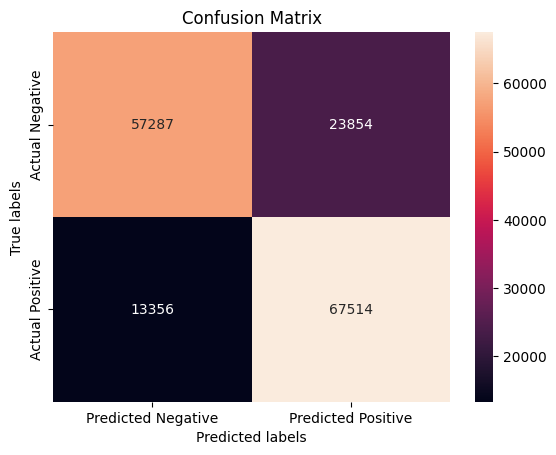

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Hacer predicciones en los datos de entrenamiento
y_pred_train = model_res.predict(X_train_res)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train_res, y_pred_train)

# Crear un DataFrame a partir de la matriz de confusión para facilitar la visualización
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Crear un mapa de calor a partir de la matriz de confusión
sns.heatmap(cm_df, annot=True, fmt='g', ax=ax)

# Añadir títulos y etiquetas
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Mostrar la figura
plt.show()

In [29]:
# Crear X e y
X_test_ = df_test_tata.drop('buy_signal', axis=1)
y_test_ = df_test_tata['buy_signal']

# Predecir con el modelo
y_pred = model_res.predict(X_res)

# Calcular métricas
accuracy = accuracy_score(y_res, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_res, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_res, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_res, y_pred)
print(f'F1 Score:  {f1}')

Accuracy: 0.7459709274766946


Precision: 0.7473190880927794
Recall: 0.7432453784168115
F1 Score:  0.7452766665346376


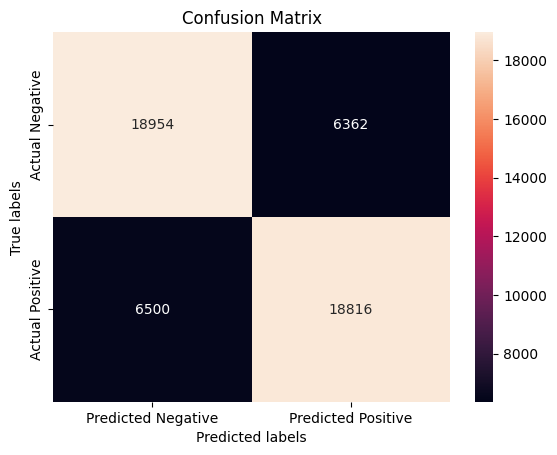

In [30]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_res, y_pred)

# Crear un DataFrame a partir de la matriz de confusión para facilitar la visualización
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Crear un mapa de calor a partir de la matriz de confusión
sns.heatmap(cm_df, annot=True, fmt='g', ax=ax)

# Añadir títulos y etiquetas
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Mostrar la figura
plt.show()

In [31]:
import pickle

# Guardar el modelo en un archivo pickle
with open('logisticreg.pkl', 'wb') as f:
    pickle.dump(model_res, f)
